Object 1 center of mass at (63.671094359169345, 162.53514353493523)
Object 2 center of mass at (136.3535307501235, 644.98967806127064)
Object 3 center of mass at (324.17985910983032, 517.04804221225652)
Object 4 center of mass at (367.91198722900504, 130.11147961506001)
Object 1 center of mass at (63.760229955587199, 166.26599169714203)
Object 2 center of mass at (131.56932542522225, 647.51170809596692)
Object 3 center of mass at (321.7101414763253, 518.37956999003643)
Object 4 center of mass at (365.10875840217676, 131.69059076691744)
Object 1 center of mass at (61.122778898212616, 165.03547168474933)
Object 2 center of mass at (127.81320889577077, 648.04537461405027)
Object 3 center of mass at (316.80089988975652, 520.5331486306618)
Object 4 center of mass at (358.33295122140623, 130.88019545820657)
Object 5 center of mass at (331.79115479115478, 411.10892710892711)


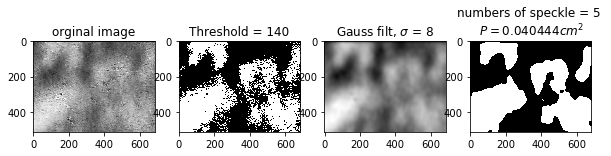

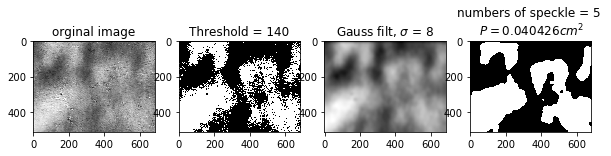

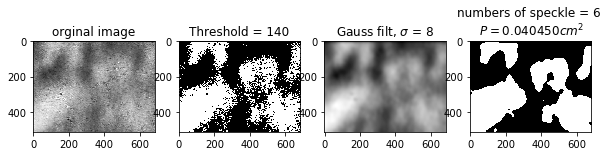

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import mahotas as mh
import os
import fnmatch

from scipy.ndimage import label
from scipy.ndimage import center_of_mass

CCD_AREA = 0.08602 #cm^2
IMG_PIXELS = 350208
SIGMA = 8


def create_plot(path):
    
    img = mh.imread(path)
    fig, axes = plt.subplots(ncols=4, figsize=(10, 5.5))
    threshold = mh.thresholding.otsu(img)

    img_filt = mh.gaussian_filter(img, SIGMA)
    labeled, nr_objects = label(img_filt > threshold)
    T_filt = mh.thresholding.otsu(img_filt.astype('uint8'))
    for k in range(1, nr_objects):
        location = str(center_of_mass(img, labeled, k))
        print("Object {} center of mass at {}".format(k, location))
    speckle_pixel = np.sum(np.sum(img > threshold))
    speckle_area = (speckle_pixel/IMG_PIXELS) * CCD_AREA

    axes[0].imshow(img, cmap=plt.cm.gray)
    axes[0].set_title("orginal image")
    axes[1].imshow(img > T_filt, cmap=plt.cm.gray)
    axes[1].set_title("Threshold = {0}".format(threshold))
    axes[2].imshow(img_filt, cmap=plt.cm.gray)
    axes[2].set_title("Gauss filt, $\sigma$ = {0}".format(SIGMA))
    axes[3].imshow(img_filt > T_filt, cmap=plt.cm.gray)
    axes[3].set_title("numbers of speckle = {0} \n $P = {1:.6f}  cm^2$".format(nr_objects, speckle_area))
    
    #plt.savefig(path.split(".")[0] + ".png", dpi=200)



cwd = os.getcwd()
image_path = os.listdir(os.path.join(cwd, "test"))

for f in image_path:
    if fnmatch.fnmatch(f, '*.BMP'):
        create_plot(os.path.join(cwd, "test", f))